In [1]:
import csv

import sqlite3

import pandas as pd

import pickle

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score , classification_report

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

from scipy.stats import zscore

import seaborn as sn

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
db_path = "./Database/controlit.db"
data_output_path = "./Data./processed_data.csv"
print("Done setting path")

Done setting path


In [3]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
print("Done connecting")

Done connecting


In [4]:
cursor.execute("Select * From sensor_readings")

In [5]:
rows = cursor.fetchall()
column_names = [first_row[0] for first_row in cursor.description]
print("Done defining rows and columns")

Done defining rows and columns


In [6]:
with open(data_output_path , "w" , newline= "") as file:
    writer = csv.writer(file)
    writer.writerow(column_names)
    writer.writerows(rows)
    
conn.close()
print("Data Exported")

Data Exported


In [7]:
data = pd.read_csv("./Data/processed_data.csv")

data.head(5)

,id,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,1,01-04-2018 00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2,01-04-2018 00:01,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,3,01-04-2018 00:02,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,4,01-04-2018 00:03,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,5,01-04-2018 00:04,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [8]:
df = pd.DataFrame(data)

df .describe()

,id,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110160.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,1.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55080.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110160.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165240.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220320.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [10]:
print(df.isnull().sum())

id                    0
timestamp             0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_15             0
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39       

In [11]:
columns_list = df.columns
print(columns_list)

Index(['id', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23',
       'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28',
       'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33',
       'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38',
       'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43',
       'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48',
       'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')


In [12]:
columns_list = columns_list.drop(['id','timestamp','machine_status'])

In [13]:
sensor_mapping  = {
    "sensor_00": "Motor Casing Vibration",
    "sensor_01": "Motor Frequency A",
    "sensor_02": "Motor Frequency B",
    "sensor_03": "Motor Frequency C",
    "sensor_04": "Motor Speed",
    "sensor_05": "Motor Current",
    "sensor_06": "Motor Active Power",
    "sensor_07": "Motor Apparent Power",
    "sensor_08": "Motor Reactive Power",
    "sensor_09": "Motor Shaft Power",
    "sensor_10": "Motor Phase Current A",
    "sensor_11": "Motor Phase Current B",
    "sensor_12": "Motor Phase Current C",
    "sensor_13": "Motor Coupling Vibration",
    "sensor_14": "Motor Phase Voltage AB",
    "sensor_15" : "Motor Phase Voltage AB",
    "sensor_16": "Motor Phase Voltage BC",
    "sensor_17": "Motor Phase Voltage CA",
    "sensor_18": "Pump Casing Vibration",
    "sensor_19": "Pump Stage 1 Impeller Speed",
    "sensor_20": "Pump Stage 1 Impeller Speed",
    "sensor_21": "Pump Stage 1 Impeller Speed",
    "sensor_22": "Pump Stage 1 Impeller Speed",
    "sensor_23": "Pump Stage 1 Impeller Speed",
    "sensor_24": "Pump Stage 1 Impeller Speed",
    "sensor_25": "Pump Stage 2 Impeller Speed",
    "sensor_26": "Pump Stage 2 Impeller Speed",
    "sensor_27": "Pump Stage 2 Impeller Speed",
    "sensor_28": "Pump Stage 2 Impeller Speed",
    "sensor_29": "Pump Stage 2 Impeller Speed",
    "sensor_30": "Pump Stage 2 Impeller Speed",
    "sensor_31": "Pump Stage 2 Impeller Speed",
    "sensor_32": "Pump Stage 2 Impeller Speed",
    "sensor_33": "Pump Stage 2 Impeller Speed",
    "sensor_34": "Pump Inlet Flow",
    "sensor_35": "Pump Discharge Flow",
    "sensor_36": "Pump UNKNOWN",
    "sensor_37": "Pump Lube Oil Overhead Reservoir Level",
    "sensor_38": "Pump Lube Oil Return Temp",
    "sensor_39": "Pump Lube Oil Supply Temp",
    "sensor_40": "Pump Thrust Bearing Active Temp",
    "sensor_41": "Motor Non Drive End Radial Bearing Temp 1",
    "sensor_42": "Motor Non Drive End Radial Bearing Temp 2",
    "sensor_43": "Pump Thrust Bearing Inactive Temp",
    "sensor_44": "Pump Drive End Radial Bearing Temp 1",
    "sensor_45": "Pump Non Drive End Radial Bearing Temp 1",
    "sensor_46": "Pump Non Drive End Radial Bearing Temp 2",
    "sensor_47": "Pump Drive End Radial Bearing Temp 2",
    "sensor_48": "Pump Inlet Pressure",
    "sensor_49": "Pump Temp Unknown",
    "sensor_50": "Pump Discharge Pressure 1",
    "sensor_51": "Pump Discharge Pressure 2"
}

with open("sensor_mappings.pkl" , 'wb') as sensor_names_file:
    
    pickle.dump(sensor_mapping, sensor_names_file)

sensor_names_file.close

for i , j in sensor_mapping.items():
    print(f"{i} : {j}")

sensor_00 : Motor Casing Vibration
sensor_01 : Motor Frequency A
sensor_02 : Motor Frequency B
sensor_03 : Motor Frequency C
sensor_04 : Motor Speed
sensor_05 : Motor Current
sensor_06 : Motor Active Power
sensor_07 : Motor Apparent Power
sensor_08 : Motor Reactive Power
sensor_09 : Motor Shaft Power
sensor_10 : Motor Phase Current A
sensor_11 : Motor Phase Current B
sensor_12 : Motor Phase Current C
sensor_13 : Motor Coupling Vibration
sensor_14 : Motor Phase Voltage AB
sensor_15 : Motor Phase Voltage AB
sensor_16 : Motor Phase Voltage BC
sensor_17 : Motor Phase Voltage CA
sensor_18 : Pump Casing Vibration
sensor_19 : Pump Stage 1 Impeller Speed
sensor_20 : Pump Stage 1 Impeller Speed
sensor_21 : Pump Stage 1 Impeller Speed
sensor_22 : Pump Stage 1 Impeller Speed
sensor_23 : Pump Stage 1 Impeller Speed
sensor_24 : Pump Stage 1 Impeller Speed
sensor_25 : Pump Stage 2 Impeller Speed
sensor_26 : Pump Stage 2 Impeller Speed
sensor_27 : Pump Stage 2 Impeller Speed
sensor_28 : Pump Stage 2 

In [14]:
imputer = SimpleImputer(strategy = 'mean')

In [15]:
for i in columns_list:
    df[i] = imputer.fit_transform(df[[i]])

In [16]:
df.describe()

,id,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,110160.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.402564,3.293904,3.666662,2.418782,144.017702,17.297501,2.140046,2.173755,2.013639,...,10.258892,11.043727,11.575646,12.836733,15.640325,10.441797,82.239917,19.142425,52.630590,105.693568
min,1.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55080.750000,2.419155,46.310761,50.390620,42.838539,626.620400,69.977212,13.346350,15.856480,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.581000,180.555600
50%,110160.500000,2.455556,48.133678,51.649300,44.227428,632.638916,75.576145,13.628470,16.167530,15.451390,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,183.049260,199.942100
75%,165240.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,204.571800,214.699100
max,220320.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [17]:
print(df.isnull().sum())

id                0
timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0


In [18]:
df.head(5)

,id,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,1,01-04-2018 00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2,01-04-2018 00:01,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,3,01-04-2018 00:02,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,4,01-04-2018 00:03,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,5,01-04-2018 00:04,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst = True)

df['date'] = df['timestamp'].dt.date

df['hour'] = df['timestamp'].dt.hour

df['day_of_the_week'] = df['timestamp'].dt.day

In [20]:
df.head(10)

,id,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,date,hour,day_of_the_week
0,1,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01,0,1
1,2,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01,0,1
2,3,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01,0,1
3,4,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01,0,1
4,5,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01,0,1
5,6,2018-04-01 00:05:00,2.453588,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,...,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL,2018-04-01,0,1
6,7,2018-04-01 00:06:00,2.455556,47.04861,53.1684,46.397568,633.3333,75.81614,13.43316,16.13136,...,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL,2018-04-01,0,1
7,8,2018-04-01 00:07:00,2.449653,47.13541,53.1684,46.397568,630.6713,75.77331,13.25231,16.12413,...,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL,2018-04-01,0,1
8,9,2018-04-01 00:08:00,2.463426,47.09201,53.1684,46.397568,631.9444,74.58916,13.28848,16.13136,...,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL,2018-04-01,0,1
9,10,2018-04-01 00:09:00,2.445718,47.17882,53.1684,46.397568,641.7823,74.57428,13.38252,16.24711,...,50.63657,39.062500,186.6319,69.73380,246.5278,200.8102,NORMAL,2018-04-01,0,1


In [21]:
daily_data = df.drop('machine_status',axis = 1).groupby(['date']).mean().reset_index()

daily_data_columns = daily_data.drop(['id','hour','date','day_of_the_week'] ,axis= 1)

daily_data_columns.describe()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,153,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2018-06-16 11:59:29.999999744,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
min,2018-04-01 11:59:30,0.181102,34.189151,33.921318,34.194398,3.210668,0.000000,1.785889,2.736349,5.912894,...,24.835611,27.065791,28.176441,28.709330,28.753939,29.619583,28.604641,28.897409,29.691117,30.204929
25%,2018-05-09 11:59:30,2.422701,46.509994,50.656555,43.095038,630.251646,70.769608,13.372239,15.891499,15.189194,...,33.894493,42.599100,39.254195,39.188099,43.953350,42.187888,93.129099,49.600748,183.049260,188.186004
50%,2018-06-16 11:59:30,2.454187,48.191670,51.641889,44.331897,631.826605,75.191813,13.573544,16.142556,15.441317,...,35.182108,43.926410,41.347375,41.987164,46.732333,44.409682,140.238394,53.162174,183.049260,202.653395
75%,2018-07-24 11:59:30,2.483304,49.266702,52.502320,45.003223,636.473333,78.986319,14.407978,16.368217,15.674030,...,36.725439,45.750322,45.661531,45.745322,51.437363,46.566961,200.488082,62.048892,202.617830,212.749968
max,2018-08-31 11:59:30,2.519554,53.667714,54.487453,46.350940,640.359938,99.999878,15.113520,17.400088,16.964561,...,68.216372,69.781899,68.359830,66.206316,65.175500,58.414110,313.535835,119.208988,259.809227,1000.000000
std,NaN,0.317243,3.001463,3.555389,2.154136,135.186769,13.361702,1.758771,1.598417,1.265013,...,4.107279,4.395625,6.054659,6.306174,7.027512,4.589415,71.296271,13.665849,44.665949,85.869828


In [22]:
daily_data_description = daily_data_columns.describe()

std_values = {}

for i in daily_data_description:
    
    if i != 'timestamp':
        
        std_values[i] = daily_data_description[i]['std']
        
std_values

{'sensor_00': 0.3172427797757728,
 'sensor_01': 3.0014634521497094,
 'sensor_02': 3.5553888653992742,
 'sensor_03': 2.154136369116654,
 'sensor_04': 135.18676924536982,
 'sensor_05': 13.361702195707812,
 'sensor_06': 1.7587710884753263,
 'sensor_07': 1.5984173928779932,
 'sensor_08': 1.2650128252945434,
 'sensor_09': 1.5410394327201478,
 'sensor_10': 11.032223154792806,
 'sensor_11': 12.065440445768967,
 'sensor_12': 8.84348956175112,
 'sensor_13': 6.08254201862875,
 'sensor_14': 109.80114425434138,
 'sensor_15': 0.009693863576651458,
 'sensor_16': 121.09030902629034,
 'sensor_17': 123.02874288164513,
 'sensor_18': 0.7105211657625926,
 'sensor_19': 191.51765497725233,
 'sensor_20': 97.65758739256607,
 'sensor_21': 215.62306598338103,
 'sensor_22': 148.31220809529233,
 'sensor_23': 279.8892642491386,
 'sensor_24': 172.51471564350823,
 'sensor_25': 212.2382417072381,
 'sensor_26': 234.53514655656957,
 'sensor_27': 122.15319701043683,
 'sensor_28': 286.3818155496953,
 'sensor_29': 210.021

In [23]:
hourly_data = df.drop('machine_status',axis =1 ).groupby(['date' , 'hour']).mean().reset_index()

hourly_data = hourly_data.drop('id',axis =1)


hourly_data_stats = pd.DataFrame(hourly_data.describe().T)

hourly_data.head(3)


hourly_data_stats.head(5)

,count,mean,min,25%,50%,75%,max,std
hour,3672.0,11.5,0.0,5.75,11.5,17.25,23.0,6.923129
timestamp,3672,2018-06-16 11:59:29.999999488,2018-04-01 00:29:30,2018-05-09 06:14:30,2018-06-16 11:59:30,2018-07-24 17:44:30,2018-08-31 23:29:30,NaN
sensor_00,3672.0,2.372221,0.001968,2.419114,2.454162,2.504307,2.539506,0.39805
sensor_01,3672.0,47.591611,32.204861,46.335901,48.106915,49.463972,55.653934,3.267268
sensor_02,3672.0,50.867392,33.167679,50.376515,51.659069,52.784646,55.933157,3.664408


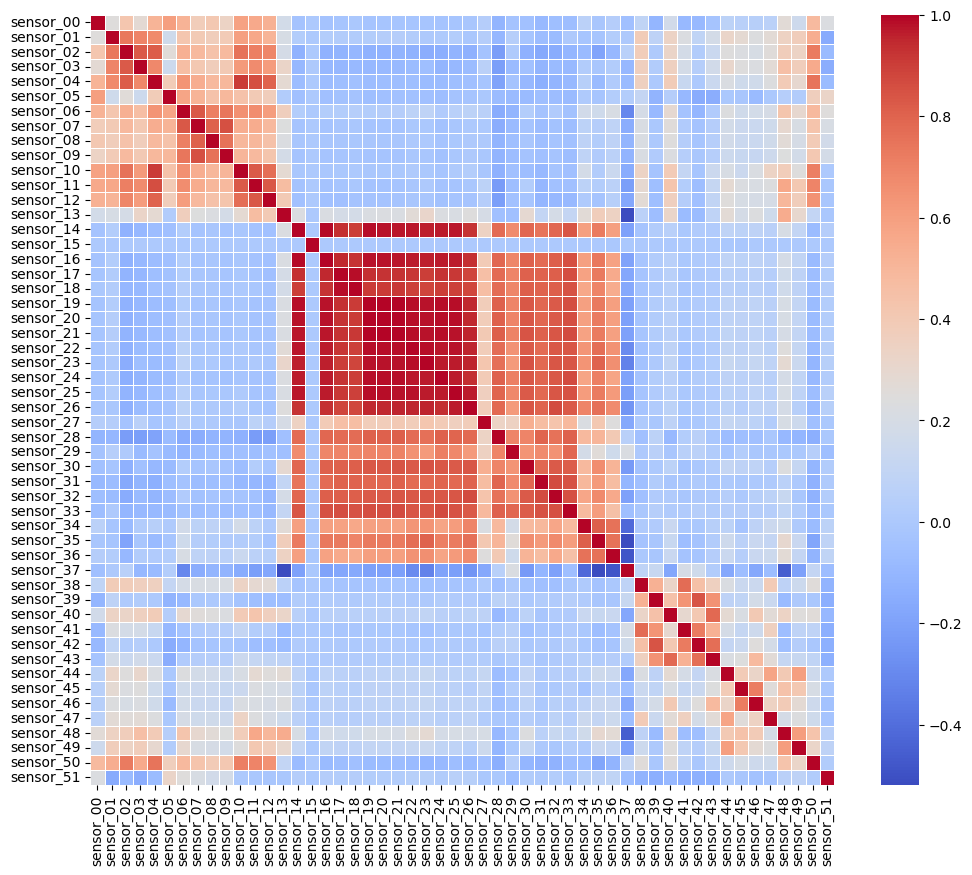

In [24]:
sensor_columns = [col for col in daily_data.columns if 'sensor' in col]

correlation_matrix = df[sensor_columns].corr()

plt.figure(figsize=(12, 10))

sn.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

plt.savefig("Correlation_Heat_Map.png" ,dpi =90)

plt.show()

In [25]:
high_corr = correlation_matrix.where((correlation_matrix > 0.8) | (correlation_matrix < -0.7))

high_corr = high_corr.stack().reset_index()

high_corr.columns = ['Sensor_A' , 'Sensor_B' , 'Correlation']

high_corr = high_corr[high_corr['Sensor_A'] != high_corr['Sensor_B']]

high_corr = high_corr.loc[high_corr['Sensor_A'] < high_corr['Sensor_B']]

correlation_df = high_corr.reset_index(drop = True)

correlation_df['Sensor_A'] = correlation_df['Sensor_A'].map(sensor_mapping)
correlation_df['Sensor_B'] = correlation_df['Sensor_B'].map(sensor_mapping)


with open("correlations_data.pkl" , "wb") as correlations_file:
    
    pickle.dump(correlation_df , correlations_file)
    
correlations_file.close

correlation_df.head(10)

,Sensor_A,Sensor_B,Correlation
0,Motor Frequency B,Motor Frequency C,0.822339
1,Motor Frequency B,Motor Speed,0.820339
2,Motor Speed,Motor Phase Current A,0.907521
3,Motor Speed,Motor Phase Current B,0.862619
4,Motor Speed,Motor Phase Current C,0.803165
5,Motor Active Power,Motor Apparent Power,0.833609
6,Motor Apparent Power,Motor Reactive Power,0.809764
7,Motor Apparent Power,Motor Shaft Power,0.855245
8,Motor Phase Current A,Motor Phase Current B,0.825888
9,Motor Phase Current B,Motor Phase Current C,0.831719


In [26]:
zscores_df = daily_data_columns.drop(['timestamp'] ,axis = 1)


z_scores = zscores_df.apply(zscore)

anomalies =  (z_scores.abs()>3)

anomalies['timestamp'] = daily_data_columns['timestamp']


anomalies_df = anomalies.groupby('timestamp').sum().reset_index()


anomalies_df.head(5)


,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2018-04-01 11:59:30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-04-02 11:59:30,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2018-04-03 11:59:30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-04-04 11:59:30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-04-05 11:59:30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


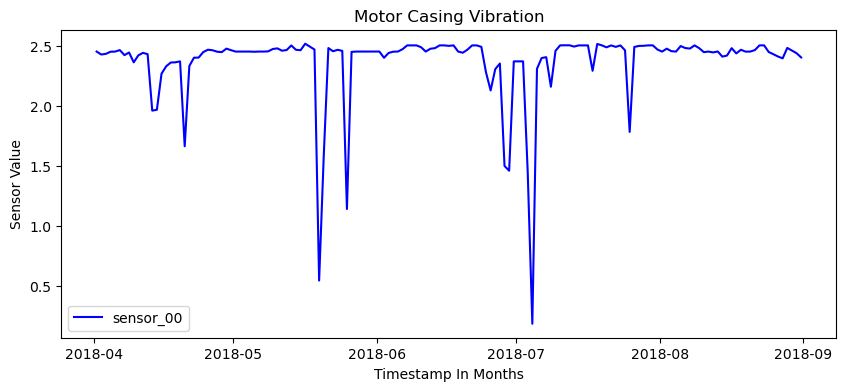

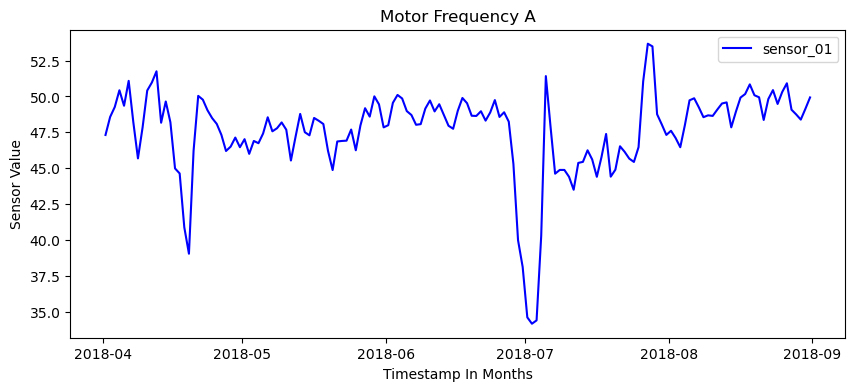

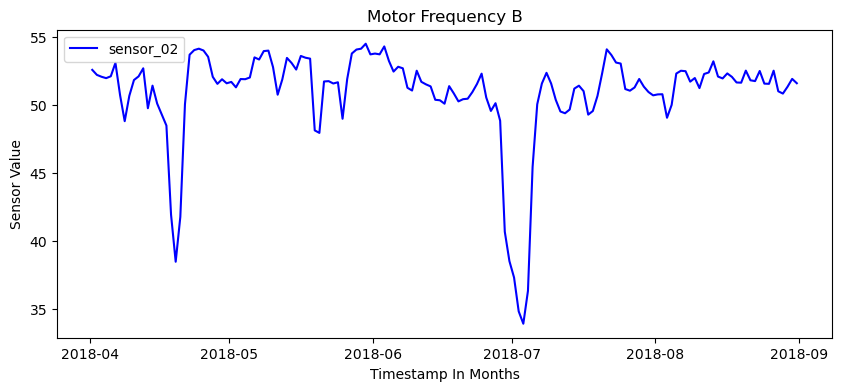

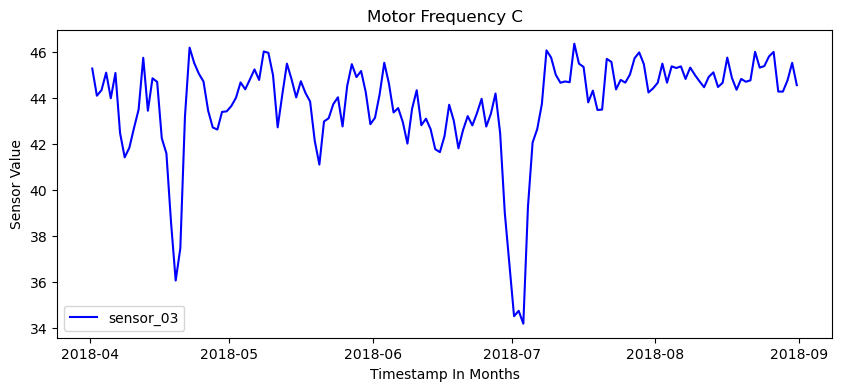

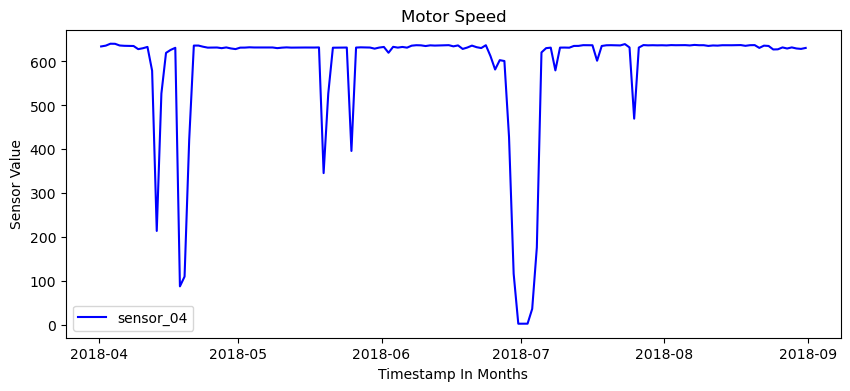

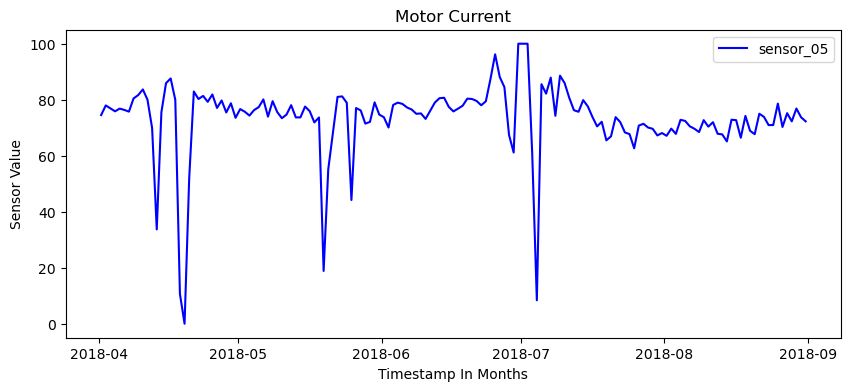

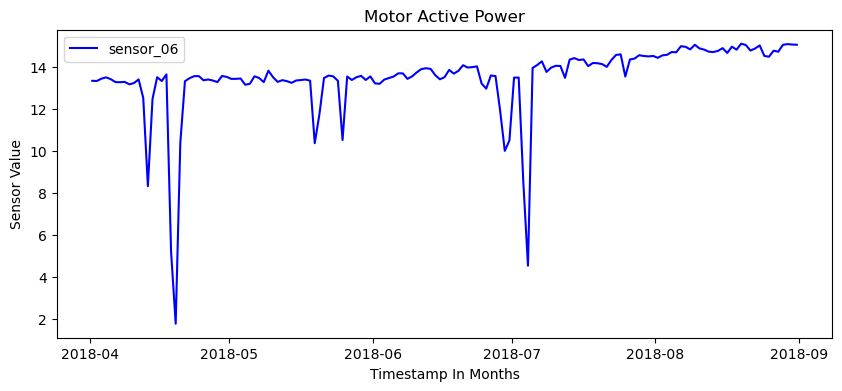

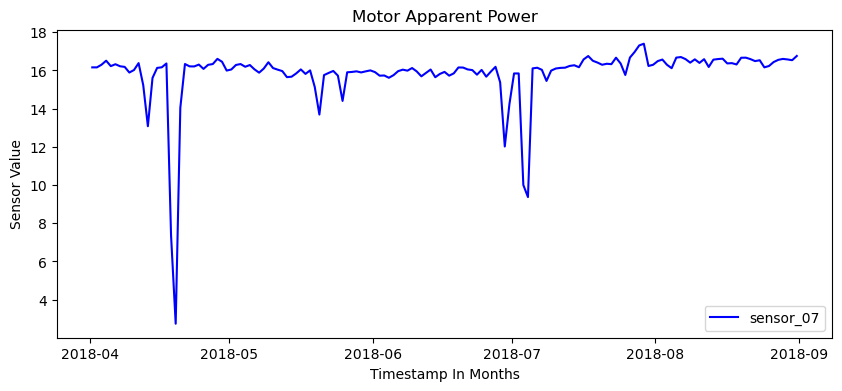

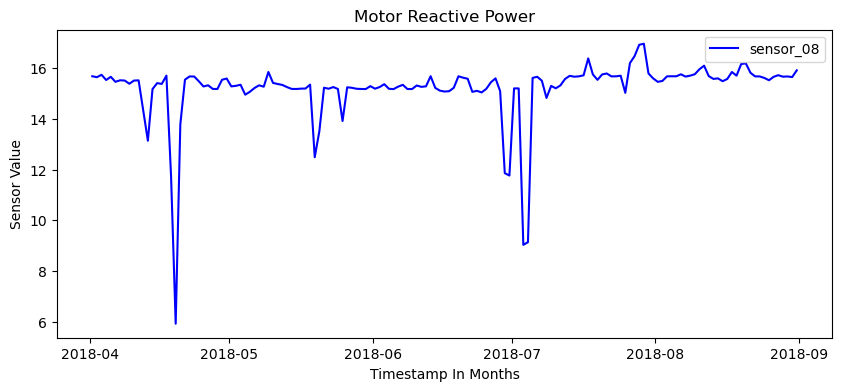

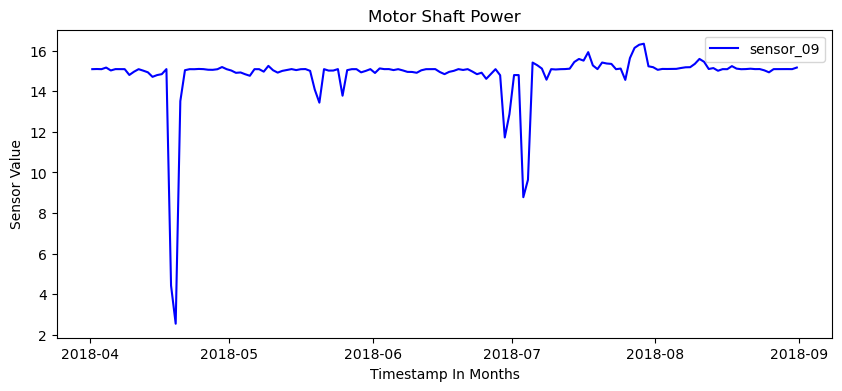

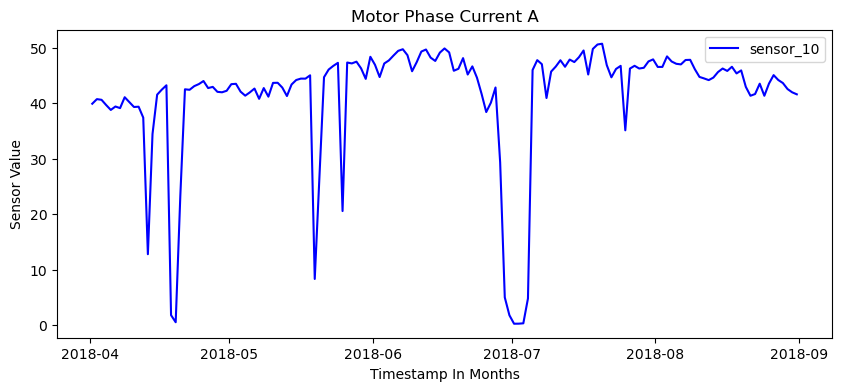

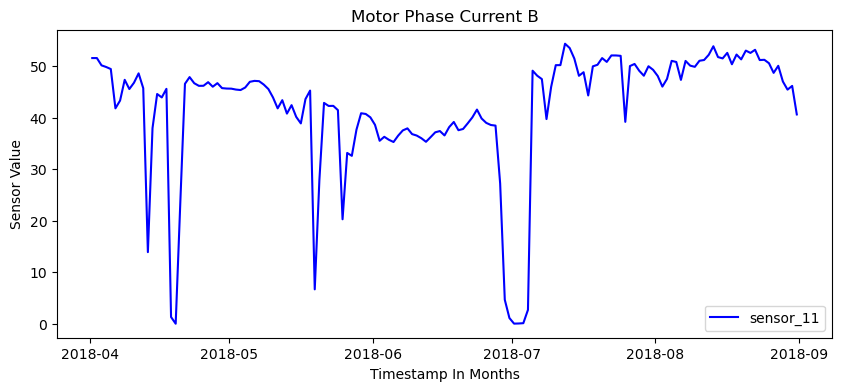

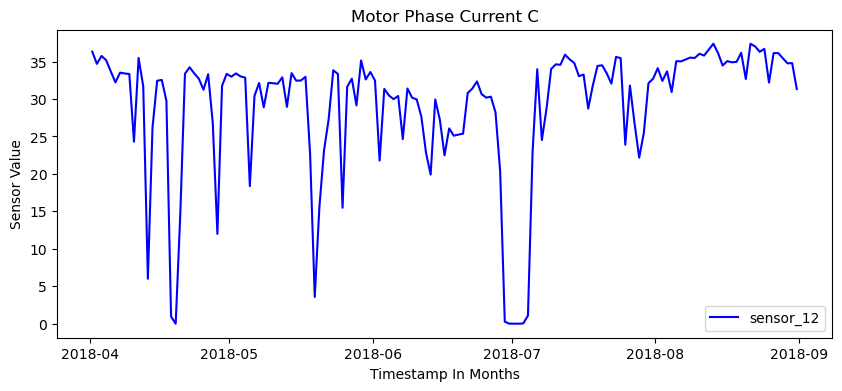

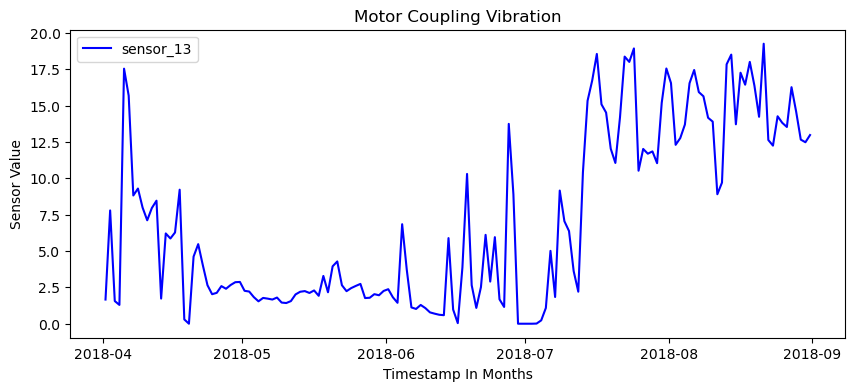

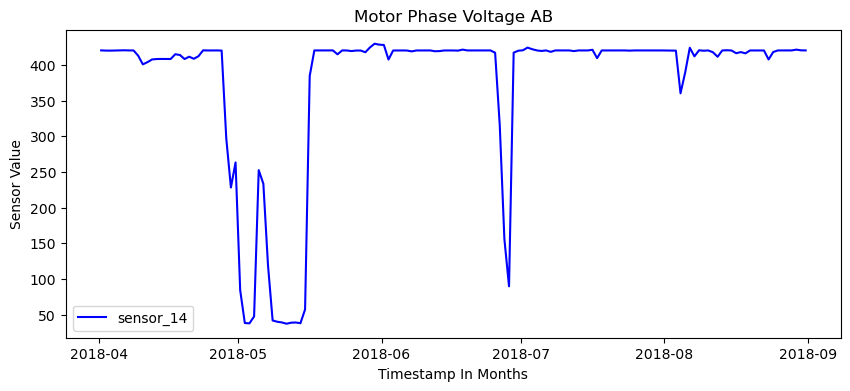

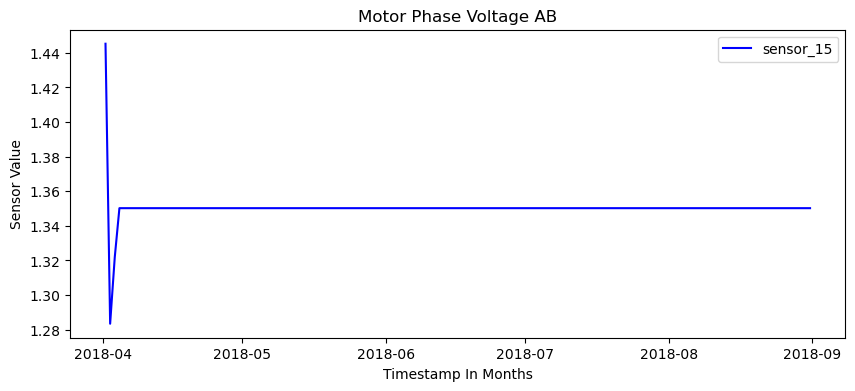

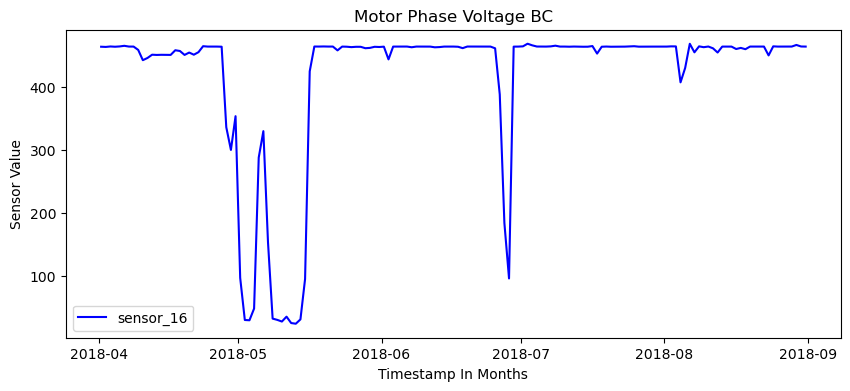

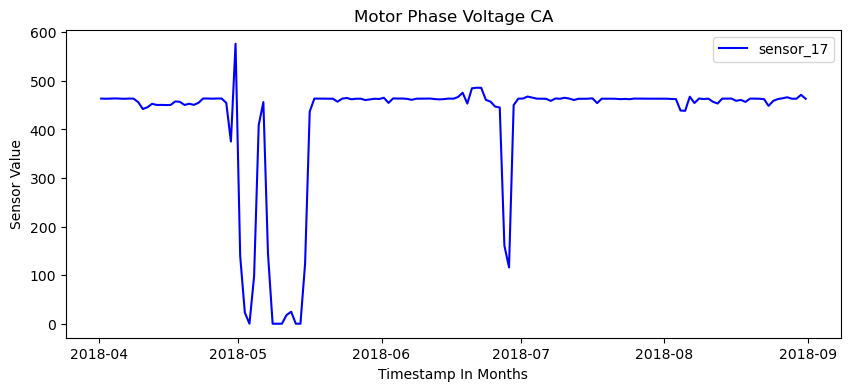

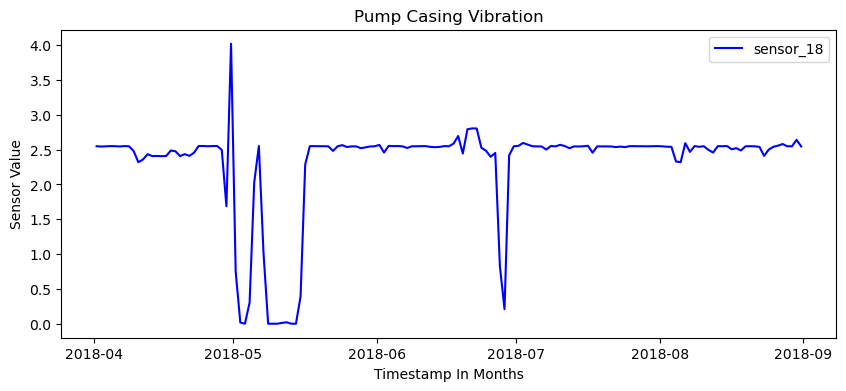

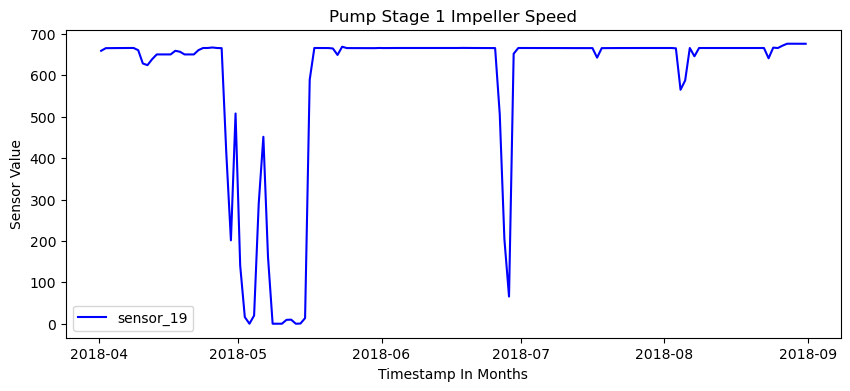

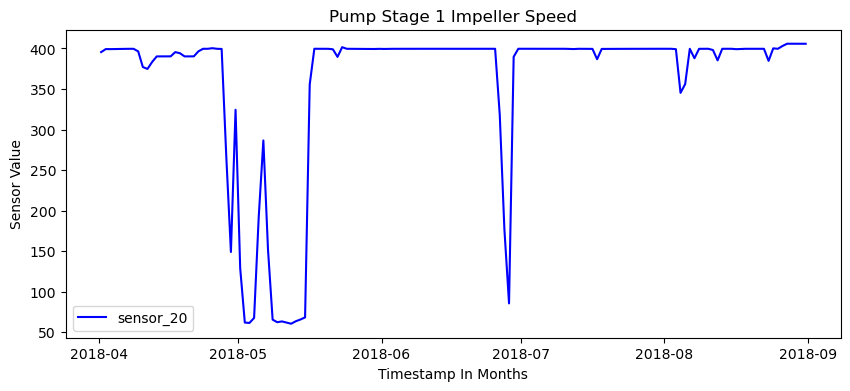

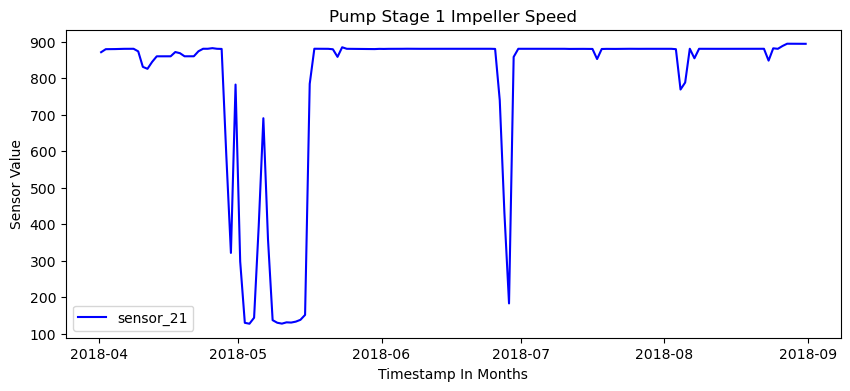

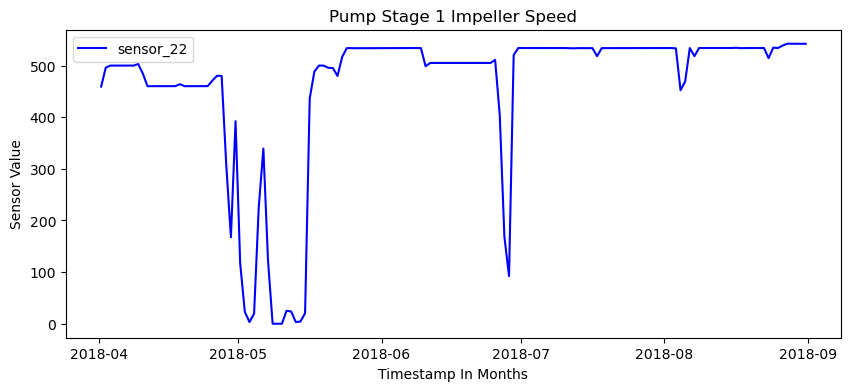

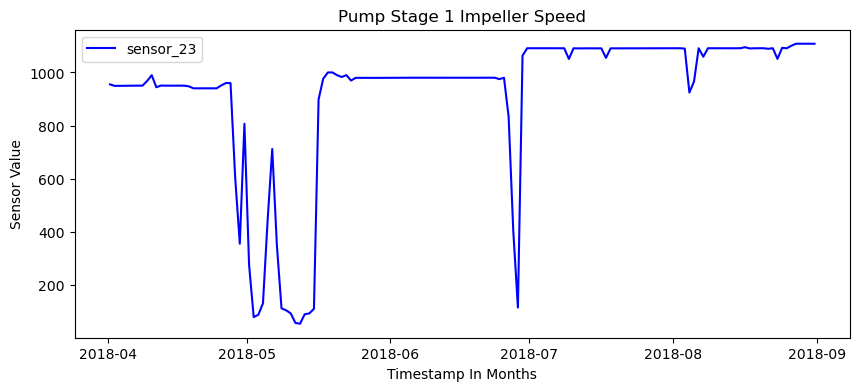

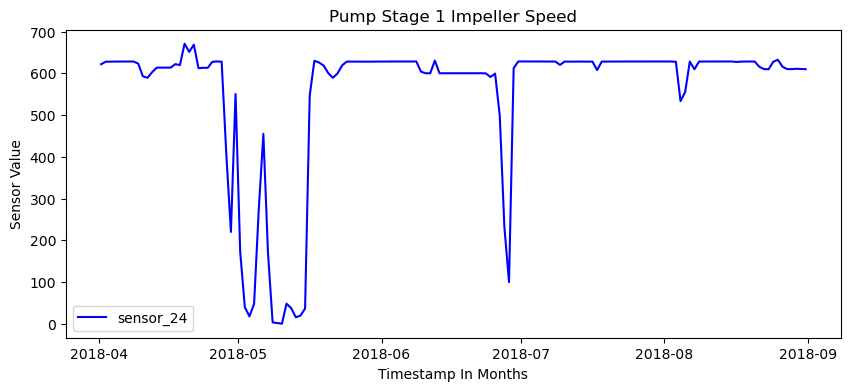

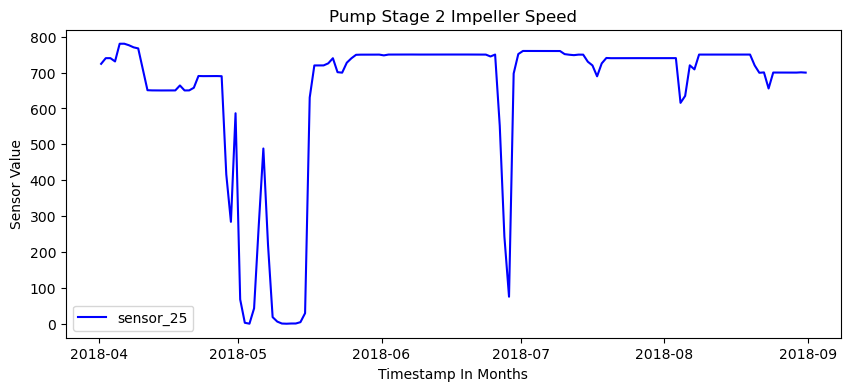

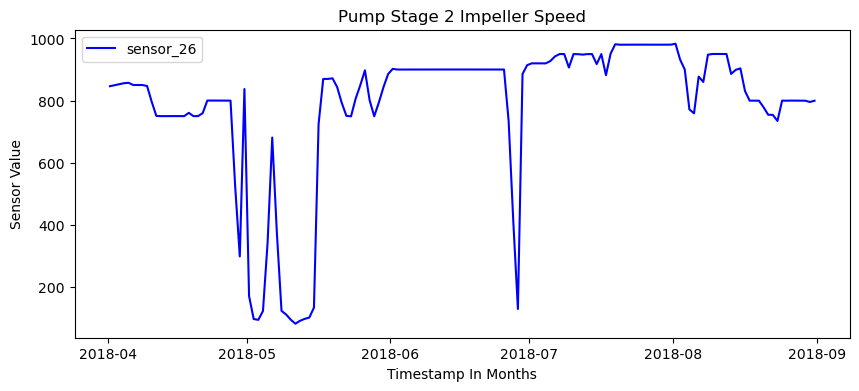

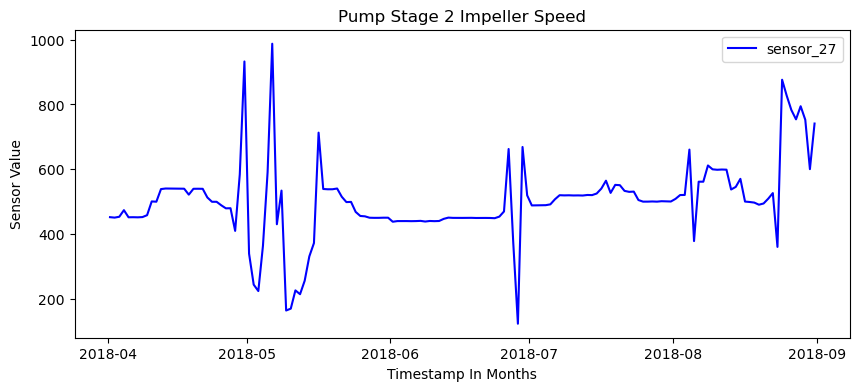

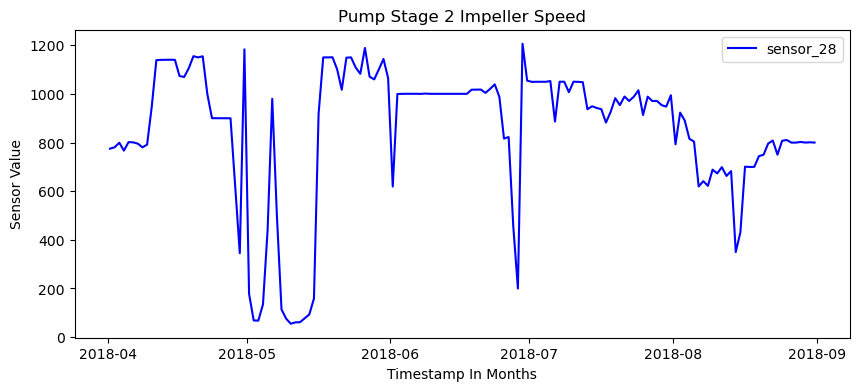

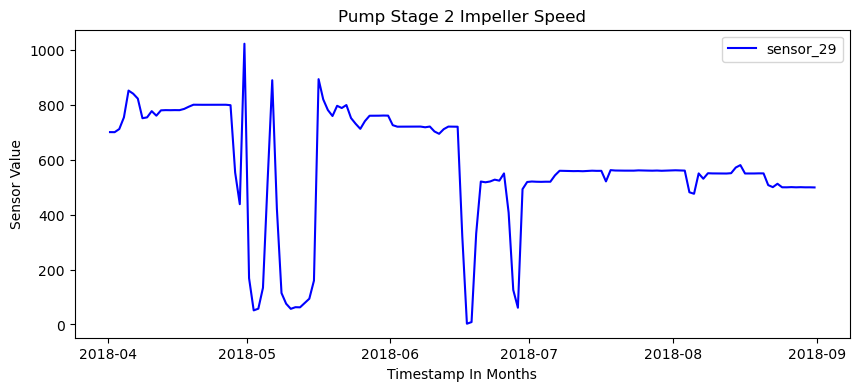

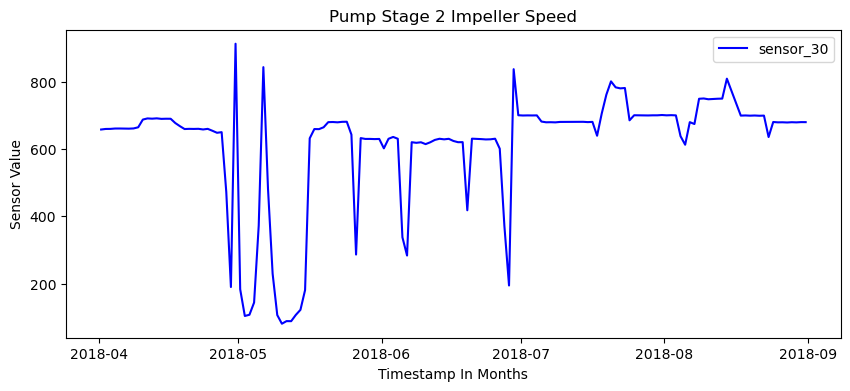

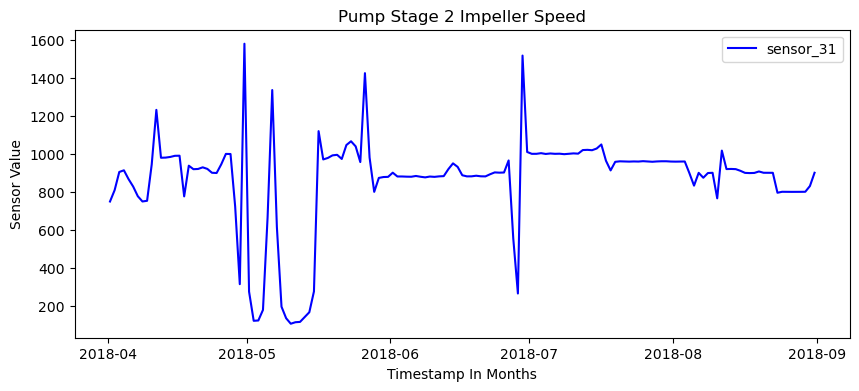

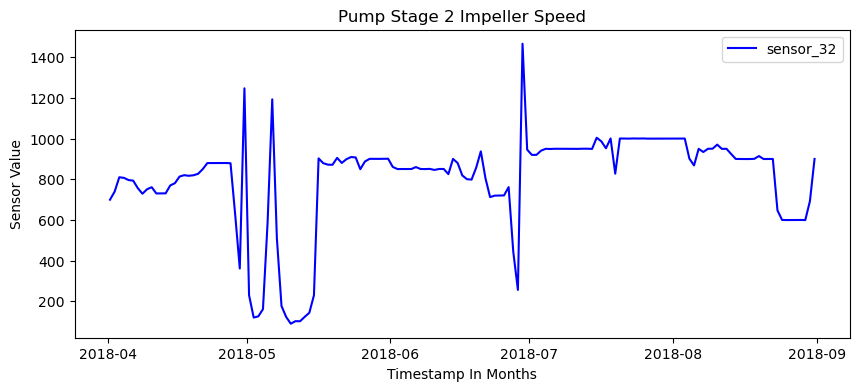

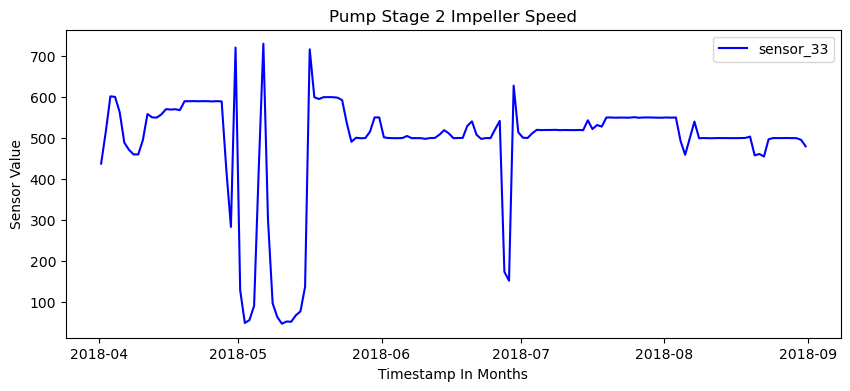

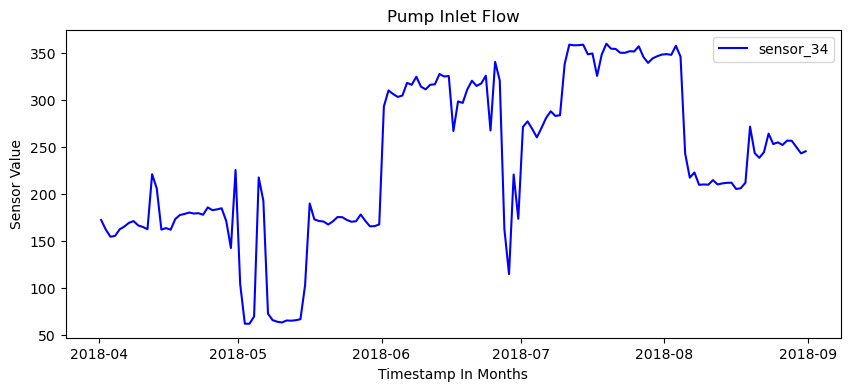

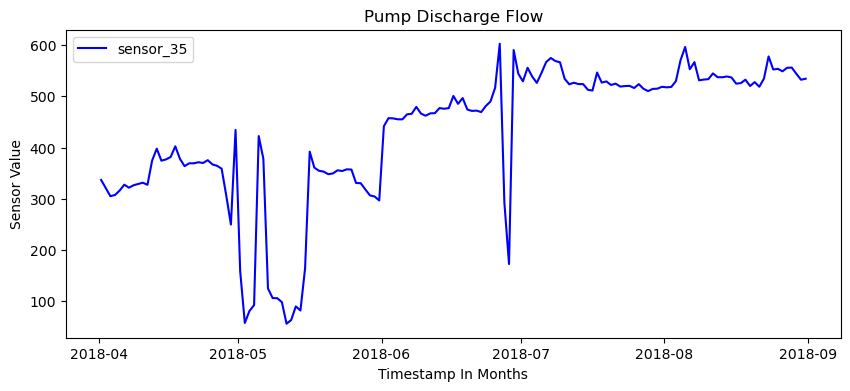

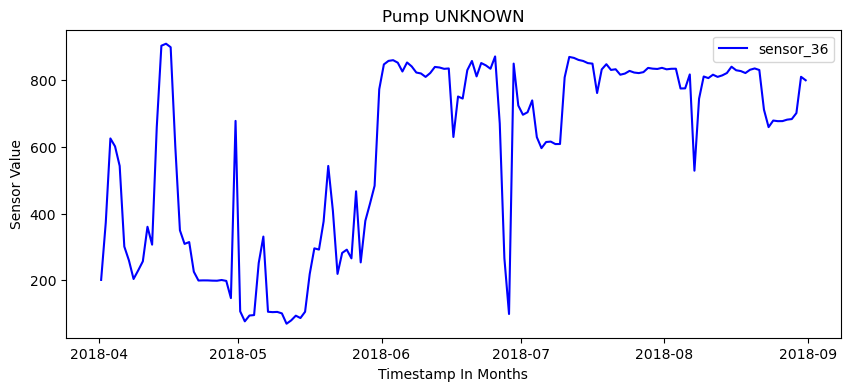

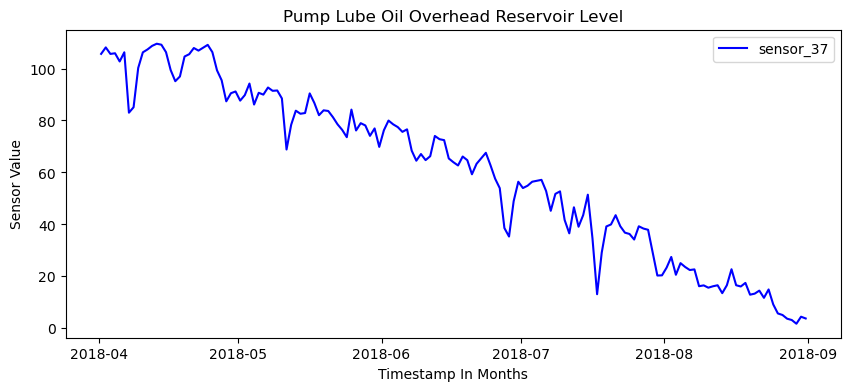

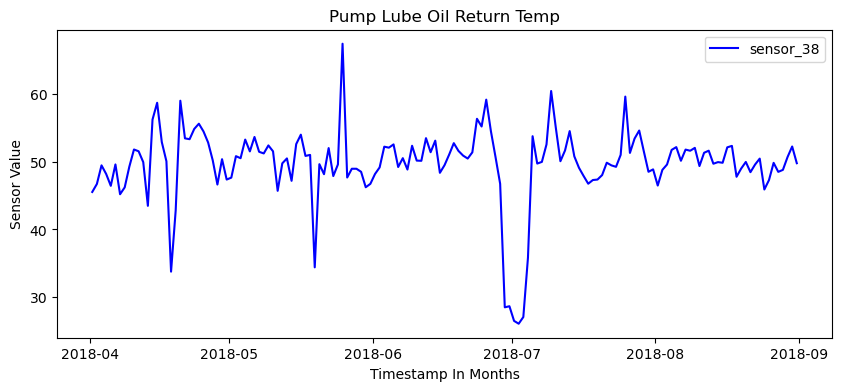

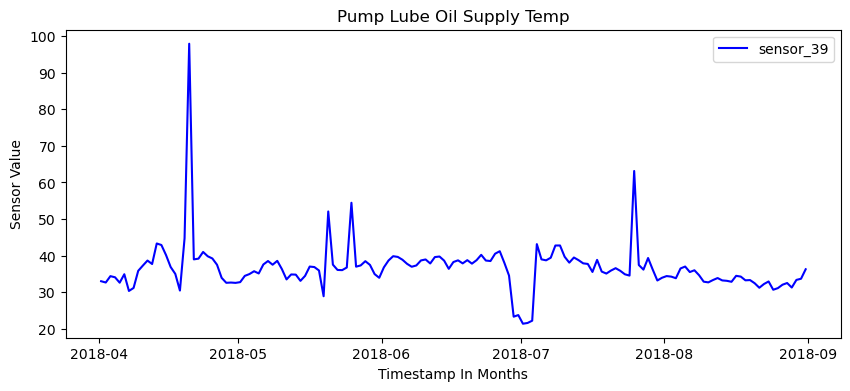

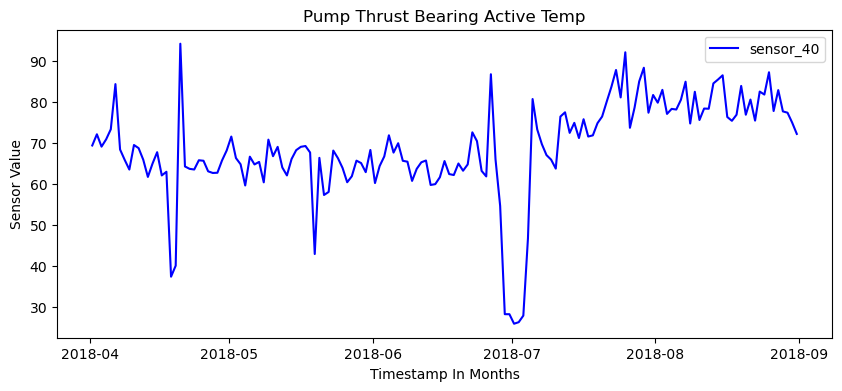

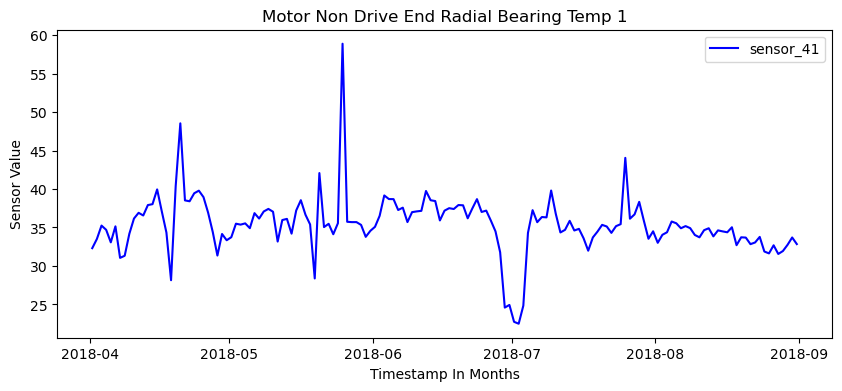

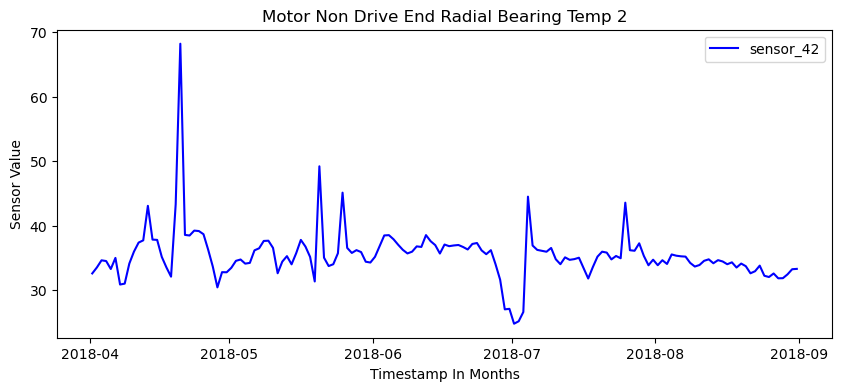

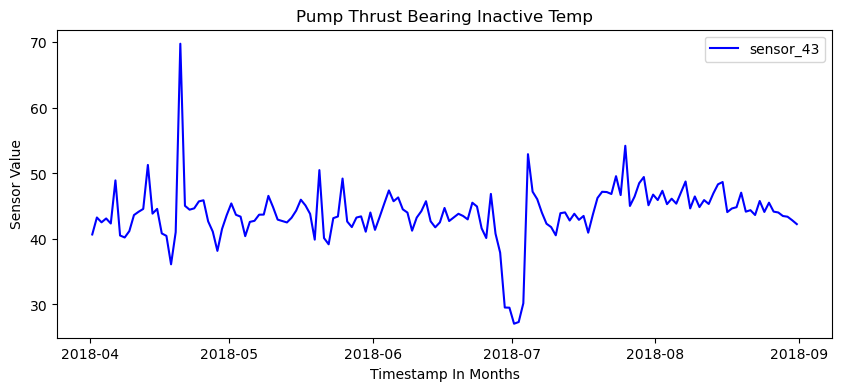

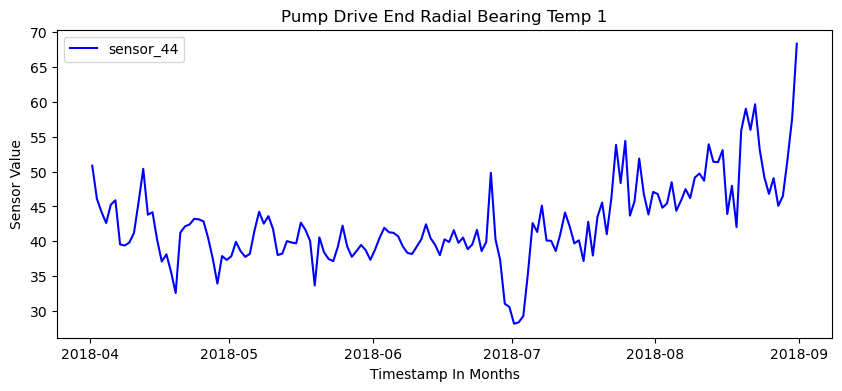

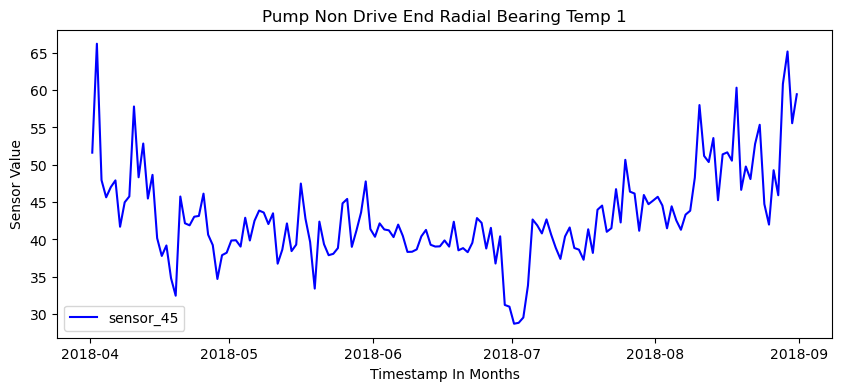

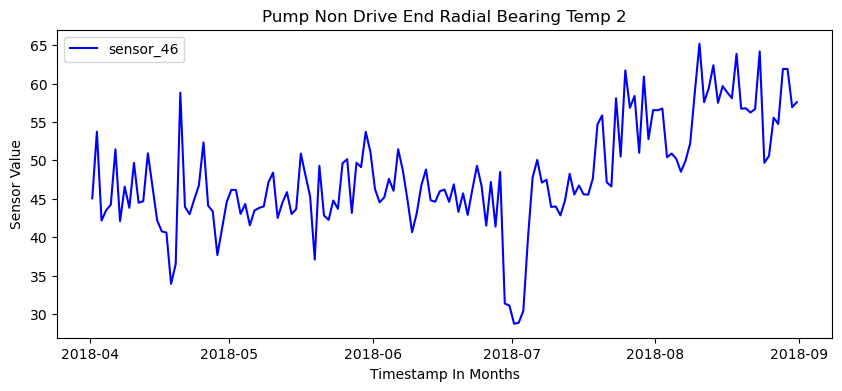

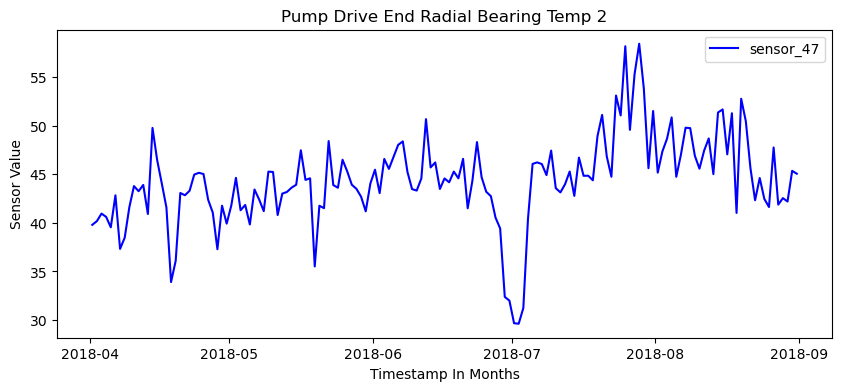

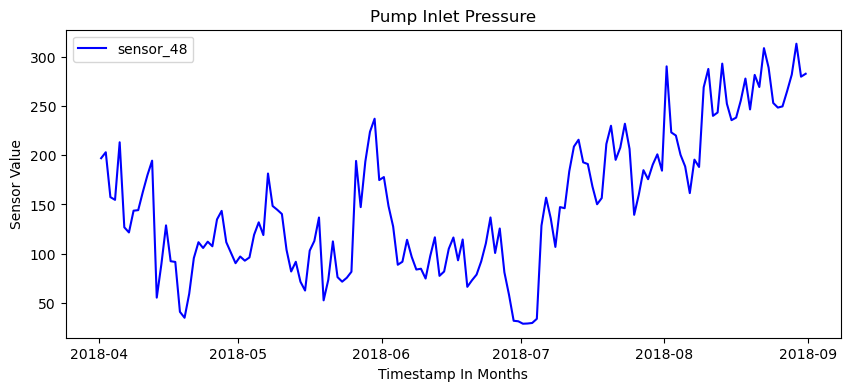

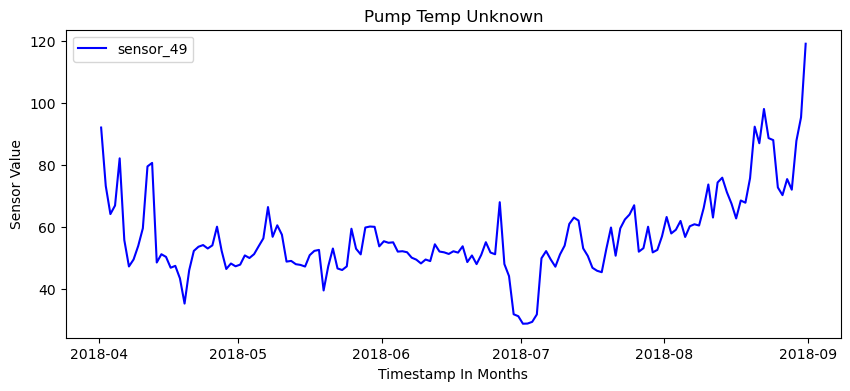

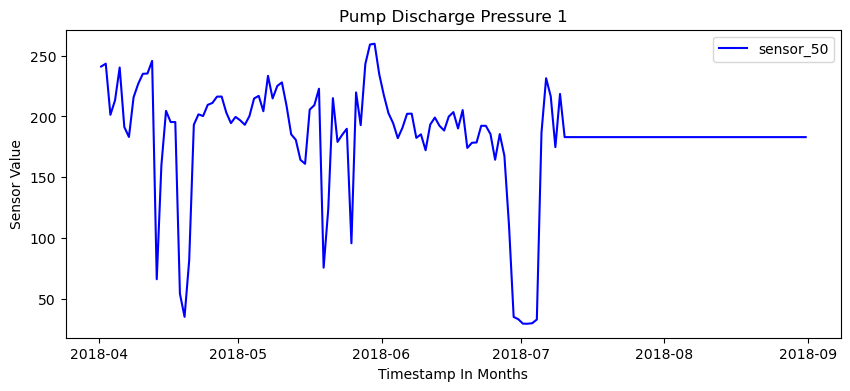

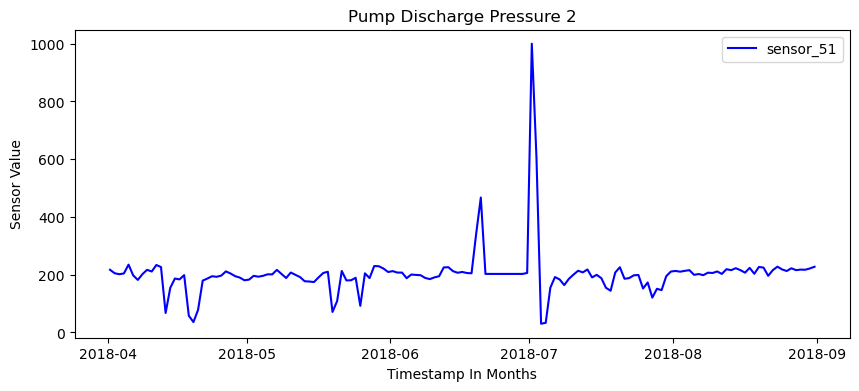

In [27]:
def plot_sensor_variations(sensor_name):
    
    plt.figure(figsize=(10,4))
    
    plt.plot(daily_data_columns['timestamp'],daily_data_columns[sensor_name],label = sensor_name , color = 'b')
    
    plt.xlabel('Timestamp In Months')

    plt.ylabel('Sensor Value')

    plt.title(sensor_mapping[sensor_name])
    
    plt.legend()
    
    filename = f"Sensor_Variations/plot_{sensor_name}.png"
    
    plt.savefig(filename , dpi = 150 ,bbox_inches='tight')
    
    
    plt.show()
    
for i in sensor_columns:
    
    plot_sensor_variations(i)

In [28]:
daily_data_stats = daily_data_columns.groupby('timestamp').agg(['mean' , 'min' , 'max','std'])

daily_data_stats.reset_index(inplace = True)

daily_data_stats.head(5)

timestamp sensor_00                          sensor_01             \
                           mean       min       max std       mean        min   
0 2018-04-01 11:59:30  2.454139  2.454139  2.454139 NaN  47.318882  47.318882   
1 2018-04-02 11:59:30  2.429367  2.429367  2.429367 NaN  48.574318  48.574318   
2 2018-04-03 11:59:30  2.435093  2.435093  2.435093 NaN  49.266702  49.266702   
3 2018-04-04 11:59:30  2.452493  2.452493  2.452493 NaN  50.429565  50.429565   
4 2018-04-05 11:59:30  2.454101  2.454101  2.454101 NaN  49.353086  49.353086   

                  sensor_02  ...  sensor_49       sensor_50              \
         max std       mean  ...        max std        mean         min   
0  47.318882 NaN  52.567363  ...  92.171022 NaN  241.056817  241.056817   
1  48.574318 NaN  52.199163  ...  73.322964 NaN  243.407801  243.407801   
2  49.266702 NaN  52.060062  ...  64.259821 NaN  201.386879  201.386879   
3  50.429565 NaN  51.959000  ...  67.019917 NaN  213.312395  213.312395   
4  49.353086 NaN  52.096564  ...  82.239020 NaN  240.274159  240.274159   

                    sensor_51                              
          max std        mean         min         max std  
0  241.056817 NaN  217.054678  217.054678  217.054678 NaN  
1  243.407801 NaN  205.087368  205.087368  205.087368 NaN  
2  201.386879 NaN  201.646492  201.646492  201.646492 NaN  
3  213.312395 NaN  204.283411  204.283411  204.283411 NaN  
4  240.274159 NaN  234.841377  234.841377  234.841377 NaN  

[5 rows x 209 columns]

In [29]:
daily_data_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in daily_data_stats.columns]

daily_data_stats.columns

Index(['timestamp', 'sensor_00_mean', 'sensor_00_min', 'sensor_00_max',
       'sensor_00_std', 'sensor_01_mean', 'sensor_01_min', 'sensor_01_max',
       'sensor_01_std', 'sensor_02_mean',
       ...
       'sensor_49_max', 'sensor_49_std', 'sensor_50_mean', 'sensor_50_min',
       'sensor_50_max', 'sensor_50_std', 'sensor_51_mean', 'sensor_51_min',
       'sensor_51_max', 'sensor_51_std'],
      dtype='object', length=209)

In [30]:
for sensor in daily_data_columns.columns:
    
    if sensor != 'timestamp':
        
        daily_data_stats[f"{sensor}_mean"] = daily_data_description.loc['mean' , sensor]

        daily_data_stats[f"{sensor}_min"] = daily_data_description.loc['min' , sensor]
        
        daily_data_stats[f"{sensor}_max"] = daily_data_description.loc['max' , sensor]
        
        daily_data_stats[f"{sensor}_std"] = daily_data_description.loc['std' , sensor]



In [31]:
daily_data_stats.head(3)

,timestamp,sensor_00_mean,sensor_00_min,sensor_00_max,sensor_00_std,sensor_01_mean,sensor_01_min,sensor_01_max,sensor_01_std,sensor_02_mean,...,sensor_49_max,sensor_49_std,sensor_50_mean,sensor_50_min,sensor_50_max,sensor_50_std,sensor_51_mean,sensor_51_min,sensor_51_max,sensor_51_std
0,2018-04-01 11:59:30,2.372221,0.181102,2.519554,0.317243,47.591611,34.189151,53.667714,3.001463,50.867392,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
1,2018-04-02 11:59:30,2.372221,0.181102,2.519554,0.317243,47.591611,34.189151,53.667714,3.001463,50.867392,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
2,2018-04-03 11:59:30,2.372221,0.181102,2.519554,0.317243,47.591611,34.189151,53.667714,3.001463,50.867392,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828


In [32]:
X = pd.DataFrame()

X['timestamp'] = daily_data['timestamp']

X.head()

,timestamp
0,2018-04-01 11:59:30
1,2018-04-02 11:59:30
2,2018-04-03 11:59:30
3,2018-04-04 11:59:30
4,2018-04-05 11:59:30


In [33]:
X = X.merge(anomalies_df , how = 'left' , on = 'timestamp')

for col in anomalies_df.columns:
    
    if col != 'timestamp':
        
        X.rename(columns={col: col.replace('sensor_' , 'sensor_')+'_anomalycount'} , inplace = True)
        
X = X.merge(daily_data_stats , how = 'right' , on = 'timestamp')


X.head(5)

,timestamp,sensor_00_anomalycount,sensor_01_anomalycount,sensor_02_anomalycount,sensor_03_anomalycount,sensor_04_anomalycount,sensor_05_anomalycount,sensor_06_anomalycount,sensor_07_anomalycount,sensor_08_anomalycount,...,sensor_49_max,sensor_49_std,sensor_50_mean,sensor_50_min,sensor_50_max,sensor_50_std,sensor_51_mean,sensor_51_min,sensor_51_max,sensor_51_std
0,2018-04-01 11:59:30,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
1,2018-04-02 11:59:30,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
2,2018-04-03 11:59:30,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
3,2018-04-04 11:59:30,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
4,2018-04-05 11:59:30,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828


In [34]:
target_df = df['machine_status']

le = LabelEncoder()

target_df = le.fit_transform(target_df)


target_df = pd.DataFrame(target_df)

target_df.columns = ['machine_status']

target_df.head(5)

df['machine_status'] = target_df['machine_status']

df['machine_status'].head()

0    1
1    1
2    1
3    1
4    1
Name: machine_status, dtype: int32

In [35]:
hourly_status = df.set_index('timestamp')['machine_status'].resample('H').max()

daily_status = hourly_status.resample('D').max()

daily_status = daily_status.reset_index()

daily_status.columns = ['timestamp' , 'machine_status']

daily_status.head(3)

daily_status = pd.DataFrame(daily_status)

daily_status['machine_status'].value_counts()

machine_status
1    147
0      6
Name: count, dtype: int64

In [36]:
daily_status.head(3)

,timestamp,machine_status
0,2018-04-01,1
1,2018-04-02,1
2,2018-04-03,1


In [37]:
X = X.drop(columns='timestamp')

daily_status = daily_status.drop(columns='timestamp')

In [39]:
X.head(3)

,sensor_00_anomalycount,sensor_01_anomalycount,sensor_02_anomalycount,sensor_03_anomalycount,sensor_04_anomalycount,sensor_05_anomalycount,sensor_06_anomalycount,sensor_07_anomalycount,sensor_08_anomalycount,sensor_09_anomalycount,...,sensor_49_max,sensor_49_std,sensor_50_mean,sensor_50_min,sensor_50_max,sensor_50_std,sensor_51_mean,sensor_51_min,sensor_51_max,sensor_51_std
0,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
1,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
2,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828


In [40]:
X.info

<bound method DataFrame.info of      sensor_00_anomalycount  sensor_01_anomalycount  sensor_02_anomalycount  \
0                         0                       0                       0   
1                         0                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   
..                      ...                     ...                     ...   
148                       0                       0                       0   
149                       0                       0                       0   
150                       0                       0                       0   
151                       0                       0                       0   
152                       0                       0                       0   

     sensor_03_anom

In [41]:
daily_status.info

<bound method DataFrame.info of      machine_status
0                 1
1                 1
2                 1
3                 1
4                 1
..              ...
148               1
149               1
150               1
151               1
152               1

[153 rows x 1 columns]>

In [42]:
smote = SMOTE(sampling_strategy = 0.5 , random_state = 10)

X_resampled ,  y_resampled = smote.fit_resample(X , daily_status)

In [43]:
X_resampled.info

<bound method DataFrame.info of      sensor_00_anomalycount  sensor_01_anomalycount  sensor_02_anomalycount  \
0                         0                       0                       0   
1                         0                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   
..                      ...                     ...                     ...   
215                       0                       1                       1   
216                       0                       0                       0   
217                       0                       1                       1   
218                       0                       1                       1   
219                       0                       0                       0   

     sensor_03_anom

In [44]:
y_resampled.info

<bound method DataFrame.info of      machine_status
0                 1
1                 1
2                 1
3                 1
4                 1
..              ...
215               0
216               0
217               0
218               0
219               0

[220 rows x 1 columns]>

In [45]:
y_resampled

,machine_status
0,1
1,1
2,1
3,1
4,1
...,...
215,0
216,0
217,0
218,0


In [46]:
X_train ,X_test , y_train  , y_test = train_test_split(X_resampled , y_resampled , test_size=0.3 , random_state= 1)

print(f"X_train = {len(X_train)}")

print(f"y_train = {len(y_train)}")

print(f"X_test = {len(X_test)}")

print(f"y_test = {len(y_test)}")

X_train = 154
y_train = 154
X_test = 66
y_test = 66


In [47]:
X_train.head(5)

,sensor_00_anomalycount,sensor_01_anomalycount,sensor_02_anomalycount,sensor_03_anomalycount,sensor_04_anomalycount,sensor_05_anomalycount,sensor_06_anomalycount,sensor_07_anomalycount,sensor_08_anomalycount,sensor_09_anomalycount,...,sensor_49_max,sensor_49_std,sensor_50_mean,sensor_50_min,sensor_50_max,sensor_50_std,sensor_51_mean,sensor_51_min,sensor_51_max,sensor_51_std
132,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
123,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
127,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
14,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
182,0,1,1,1,1,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828


In [48]:
X_test.head(5)

,sensor_00_anomalycount,sensor_01_anomalycount,sensor_02_anomalycount,sensor_03_anomalycount,sensor_04_anomalycount,sensor_05_anomalycount,sensor_06_anomalycount,sensor_07_anomalycount,sensor_08_anomalycount,sensor_09_anomalycount,...,sensor_49_max,sensor_49_std,sensor_50_mean,sensor_50_min,sensor_50_max,sensor_50_std,sensor_51_mean,sensor_51_min,sensor_51_max,sensor_51_std
91,0,1,1,1,1,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
34,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
105,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
180,0,0,1,1,1,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828
88,0,0,0,0,0,0,0,0,0,0,...,119.208988,13.665849,183.04926,29.691117,259.809227,44.665949,202.699667,30.204929,1000.0,85.869828


In [49]:
y_train.head(5)

,machine_status
132,1
123,1
127,1
14,1
182,0


In [50]:
y_test.head(5)

,machine_status
91,0
34,1
105,1
180,0
88,1


In [51]:
models = {
    "RandomForest" : {
        'model' : RandomForestClassifier(random_state = 1),
        'params' : {
            'n_estimators' : [50,100,200],
            'max_depth' : [10,20,None]
        }
    },
    "SVM" : {
        'model' : SVC(random_state = 1),
        'params' : {
            'C' : [0.1,1,10],
            'kernel' : ['linear' , 'rbf' , 'poly']
        }
    },
    "LogisticRegression" : {
        'model' : LogisticRegression(random_state = 1),
        'params' : {
            'C' : [0.1,1,10],
            'solver' : ['liblinear' , 'lbfgs']
        }
    }
}

In [52]:
best_models = {}

for i , j in models.items():
    
    grid_search = GridSearchCV(estimator= j['model'] , param_grid = j['params'] , scoring="accuracy")
    
    grid_search.fit(X_train , y_train)
    
    best_models['name'] = {
        
        "best_estimator" : grid_search.best_estimator_,
        'best_params' : grid_search.best_params_,
        'best_score' : grid_search.best_score_
    }

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

In [53]:
best_models

{'name': {'best_estimator': LogisticRegression(C=0.1, random_state=1, solver='liblinear'),
  'best_params': {'C': 0.1, 'solver': 'liblinear'},
  'best_score': 0.9935483870967742}}

In [54]:
best_model = best_models['name']['best_estimator']

best_model

LogisticRegression(C=0.1, random_state=1, solver='liblinear')

In [55]:
best_model.fit(X_train, y_train)

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, random_state=1, solver='liblinear')

In [56]:
y_predicted = best_model.predict(X_test)

accuracy = accuracy_score(y_test , y_predicted)

print("accuracy :", accuracy)

print(classification_report(y_test,y_predicted))

accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        43

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [57]:
X['sensor_00_anomalycount']

0      0
1      0
2      0
3      0
4      0
      ..
148    0
149    0
150    0
151    0
152    0
Name: sensor_00_anomalycount, Length: 153, dtype: int64

In [58]:
import numpy as np

In [59]:
sensor_stats = {}

for i in range(52):
    
    sensor_name = f"sensor_{i:02d}"
    
    sensor_stats[sensor_name] = {
        
        'mean' : daily_data_stats[f'{sensor_name}_mean'].mean(),
        
        'min' : daily_data_stats[f'{sensor_name}_min'].mean(),
        
        'max' : daily_data_stats[f'{sensor_name}_max'].mean(),
        
        'std' : std_values[sensor_name],
        
        'anomaly_count' : X[f'{sensor_name}_anomalycount'].mean(),
        
        'anomaly_threshold' : daily_data_stats[f'{sensor_name}_mean'].mean() + std_values[sensor_name]
        
        
        
    }

sensor_stats

{'sensor_00': {'mean': 2.3722208156103464,
  'min': 0.181101597059181,
  'max': 2.5195535916666674,
  'std': 0.3172427797757728,
  'anomaly_count': 0.0196078431372549,
  'anomaly_threshold': 2.689463595386119},
 'sensor_01': {'mean': 47.59161070047828,
  'min': 34.18915061853472,
  'max': 53.66771365972221,
  'std': 3.0014634521497094,
  'anomaly_count': 0.026143790849673203,
  'anomaly_threshold': 50.593074152627985},
 'sensor_02': {'mean': 50.86739214875166,
  'min': 33.92131833194965,
  'max': 54.4874531778125,
  'std': 3.5553888653992742,
  'anomaly_count': 0.0392156862745098,
  'anomaly_threshold': 54.422781014150935},
 'sensor_03': {'mean': 43.75248102928339,
  'min': 34.19439845790179,
  'max': 46.35093986860417,
  'std': 2.154136369116654,
  'anomaly_count': 0.032679738562091505,
  'anomaly_threshold': 45.906617398400044},
 'sensor_04': {'mean': 590.6739358979354,
  'min': 3.210668208149305,
  'max': 640.3599381944443,
  'std': 135.18676924536982,
  'anomaly_count': 0.052287581

In [60]:
daily_data_stats.columns

Index(['timestamp', 'sensor_00_mean', 'sensor_00_min', 'sensor_00_max',
       'sensor_00_std', 'sensor_01_mean', 'sensor_01_min', 'sensor_01_max',
       'sensor_01_std', 'sensor_02_mean',
       ...
       'sensor_49_max', 'sensor_49_std', 'sensor_50_mean', 'sensor_50_min',
       'sensor_50_max', 'sensor_50_std', 'sensor_51_mean', 'sensor_51_min',
       'sensor_51_max', 'sensor_51_std'],
      dtype='object', length=209)

In [61]:
std_values.keys()

dict_keys(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51'])

In [62]:
with open ("sensor_stats.pkl" , "wb") as file:
    
    pickle.dump(sensor_stats , file)
    
file.close

<function BufferedWriter.close>

In [63]:
with open("model.pkl", "wb") as model_file:
    
    pickle.dump(best_model , model_file)
    
model_file.close

<function BufferedWriter.close>

In [64]:
with open("model.pkl" , "rb") as model_f:
    
    prediction_model = pickle.load(model_f)
    
    
prediction_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [65]:
with open("X_train_columns.pkl" , "wb") as columns_file:
    
    pickle.dump(X_train.columns , columns_file)
    
columns_file.close

<function BufferedWriter.close>

In [66]:
with open("std_values.pkl" , "wb") as std_values_file:
    
    pickle.dump(std_values , std_values_file)

std_values_file.close

<function BufferedWriter.close>